# Topic Modelling/ Extraction Task

## Import Packages

In [1]:
import re
import sys
import os
#!{sys.executable} -m pip install -U sec-edgar-downloader

from sec_edgar_downloader import Downloader

#!{sys.executable} -m pip install 'beautifulsoup4==4.5.3'
#!{sys.executable} -m pip install html-table-extractor
#!{sys.executable} -m pip install html2text
#!{sys.executable} -m pip install tqdm
#!{sys.executable} -m pip install wordcloud
#!{sys.executable} -m pip install country_list

from bs4 import BeautifulSoup as bsoup

import textwrap
import html2text
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from tqdm.notebook import tqdm

import nltk
nltk.download('stopwords')
#!{sys.executable} -m pip install spacy download en


import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

# Gensim is a great package that supports topic modelling and other NLP tools

#!{sys.executable} -m pip install gensim


import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess

# spacy for lemmatization
import spacy

# Plotting tools
#!{sys.executable} -m pip install pyLDAvis
import pyLDAvis
#import pyLDAvis.gensim

from lxml import html

from bs4 import BeautifulSoup as bs
from lxml.etree import tostring
from lxml.html import tostring
#!{sys.executable} -m pip install htmllaundry

from htmllaundry import sanitize

#!{sys.executable} -m pip install text_preprocessing

from text_preprocessing import preprocess_text


os.chdir(r"/Users/szoriac/OneDrive/Python/10k10q") 
print(os.getcwd())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/szoriac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/szoriac/OneDrive/Python/10k10q


## Download 10-Q files using list of tickers and SEC EDGAR Downloader package

In [2]:
dl = Downloader('/Users/szoriac/OneDrive/Python/10k10q/10k10qfiles')
PATH = '/Users/szoriac/OneDrive/Python/10k10q/10k10qfiles'
#equity_ids = 
#for equity_id in equity_ids:
#        dl.get("10-Q", equity_id, amount = 4)

SYMBOLS = ["INFN" , "LITE" , "MSFT" , "NET" , "NFLX" , "NPTN" , "AAOI" , "AAPL" , "ACIA" , "AMZN" , "ANET" , "CASA" , "CHTR" , "CIEN" , "CMCSA" , "COMM" , "CSCO" , "CTL" , "DATA" ]
           # The ARGS variable holds some hardcoded information that we might need to reuse
ARGS = {"Type of Report": "10-Q",
        "Companies": SYMBOLS,
        }



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for symbol in SYMBOLS:
  dl.get(ARGS["Type of Report"], symbol, amount = 4)


In [3]:
PATH = '/Users/szoriac/OneDrive/Python/10k10q/10k10qfiles'

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Topic modelling

In [ ]:


#def createDataframe(company_list):
df = pd.DataFrame(columns=["Company", "Year", "ReportNumber", "Report"])
start_index = {"AMZN": 49257}
end_index = {"AMZN": 185190}

for company in tqdm(ARGS["Companies"]):
#    try:
        folders= os.listdir(PATH + "/sec-edgar-filings/" + company + "/10-Q")
        for index, folder in enumerate(folders):
            if not folder.startswith('.'):
                indivdirectory = PATH + "/sec-edgar-filings/" + company + "/10-Q/" + folder
                #print(indivdirectory)
                #foldreports = 
                #print(enumerate(foldreports))

                for root, dirs, files in os.walk(indivdirectory):
                    #print(root)
                    specificreport = root.split('/')[10]

                    opened_file = open(root + '/' + files[1], "r", encoding = 'latin-1')
                    full_text = opened_file.read()
                    full_text_length = len(full_text)
                    opened_file.close()

                    try:
                        if company in start_index.keys():
                            start = start_index[company]
                            end = end_index[company]
                        else:
                            start = 44800
                            end = 200000
                        text = html2text.html2text(full_text)
                        t_len = len(text)
                        relevant_text = text[round(t_len*0.003):round(t_len*0.08)]
                        yr = int(specificreport.split("-")[1])
                        if yr > 20:
                            yr = 1900 + yr
                        else:
                            yr = 2000 + yr
                        
                        numb = int(specificreport.split("-")[2])
                        df = df.append({"Company": company, "Year": yr, "ReportNumber":numb,  "Report": text}, ignore_index=True)

                    except:
                        print(company, "Failed")
   # except: 
        #pass
    #return df

In [23]:
df

ions equipment. For example, in May 2018, the General\nData Protection Regulation (the â\x80\x9cGDPRâ\x80\x9d) came into effect, superseding\nthen-current EU data protection regulations. The GDPR imposes stringent data\nhandling requirements on companies that receive or process personal data of\nresidents of the EU, and non-compliance with the GDPR could result in\nsignificant penalties, including data protection audits and heavy fines. Any\nfailure to obtain the required approvals or comply with such laws and\nregulations could harm our business and operating results.\n\nNatural disasters, terrorist attacks or other catastrophic events could harm\nour operations.\n\nOur headquarters and the majority of our infrastructure, including our PIC\nfabrication manufacturing facility, are located in Northern California, an\narea that is susceptible to earthquakes, floods and other natural disasters.\nFurther, a terrorist attack aimed at Northern California or at the United\nStates energy or te

In [193]:
import re

def clean_dataset(text):
    # Make Lowercase
    text = text.lower()
    # Remove some remaining html
    text = re.sub(r"font", "", text)
    text = re.sub(r"size", "", text)
    text = re.sub(r"pt", "", text)
    text = re.sub(r"px", "", text)
    text = re.sub(r"padding", "", text)
    text = re.sub(r"family", "", text)
    text = re.sub(r"style", "", text)
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r"\&\w*;", "", text)
    # Remove tickers
    text = re.sub(r"\$\w*", "", text)
    # Remove hyperlinks & URLs
    text = re.sub(r"https?:\/\/.*\/\w*", "", text)
    text = re.sub(r"http(\S)+", "", text)
    text = re.sub(r"http ...", "", text)
    # Remove whitespace (including new line characters)
    text = re.sub(r"\s\s+", "", text)
    text = re.sub(r"[ ]{2, }", " ", text)
    # &, < and >
    text = re.sub(r"&amp;?", "and", text)
    text = re.sub(r"&lt;", "<", text)
    text = re.sub(r"â", "", text)
    text = re.sub(r"&gt;", ">", text)
    # Insert space between words and punctuation marks
    text = re.sub(r'\[\[(?:[^\]|]*\|)?([^\]|]*)\]\]', r'\1', text)
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    text = "".join(c for c in text if c <= "\uFFFF")
    text = text.strip()
    text = " ".join(text.split())

    return text

In [36]:
df["Reportcleaned"] = df["Report"].apply(clean_dataset)

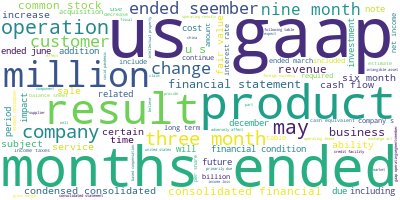

In [37]:
from wordcloud import WordCloud

def make_wordcloud(series):
  all_text = ','.join(list(series.values))
  wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3)
  wordcloud.generate(all_text)
  return wordcloud.to_image()

make_wordcloud(df.Reportcleaned)


In [50]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
  """
  This function simply removes all of the stopwords we have specified in the list stop_words.
  """
  return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def bigrams(words, bi_min=3):
  """
  https://radimrehurek.com/gensim/models/phrases.html
  """
  bigram = gensim.models.Phrases(words, min_count = bi_min)
  bigram_mod = gensim.models.phrases.Phraser(bigram)
  return bigram_mod

def get_corpus(df):  
    words = list(sent_to_words(df.Report))
    words = remove_stopwords(words)
    bigram = bigrams(words)
    bigram = [bigram[report] for report in words]
    id2word = gensim.corpora.Dictionary(bigram)
    id2word.filter_extremes(no_below=3, no_above=0.35)
    id2word.compactify()
    corpus = [id2word.doc2bow(text) for text in bigram]
    return corpus, id2word, bigram

In [51]:
train_corpus, train_id2word, bigram_train = get_corpus(df)

In [54]:
NUM_TOPICS = 20
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    lda_train = gensim.models.ldamulticore.LdaMulticore(
                           corpus=train_corpus,
                           num_topics=NUM_TOPICS,
                           id2word=train_id2word,
                           chunksize=50,
                           workers=4,
                           passes=100,
                           eval_every = 1,
                           per_word_topics=True)


In [55]:
coherencemodel = CoherenceModel(lda_train, texts=bigram_train, dictionary=train_id2word)
print (coherencemodel.get_coherence())

0.4446183955443609


## Trying the table extraction approach

### Extracting html structure, html text, year information, company name, of each file 

In [4]:
df = pd.DataFrame(columns=["Company", "Year", "ReportNumber", "html", "htmltext"])
start_index = {"AMZN": 49257}
end_index = {"AMZN": 185190}

for company in tqdm(ARGS["Companies"]):

        folders= os.listdir(PATH + "/sec-edgar-filings/" + company + "/10-Q")
        for index, folder in enumerate(folders):
            if not folder.startswith('.'):
                indivdirectory = PATH + "/sec-edgar-filings/" + company + "/10-Q/" + folder

                for root, dirs, files in os.walk(indivdirectory):
                
                    specificreport = root.split('/')[10]

                    opened_file = open(root + '/' + files[1], "r", encoding = 'latin-1')
                    full_text = opened_file.read()
                    tree = html.fromstring(bytes(full_text, encoding='latin-1'))            
                    opened_file.close()

                    #print(type(tree))


                    yr = int(specificreport.split("-")[1])
                    if yr > 30:
                        yr = 1900 + yr
                    else:
                        yr = 2000 + yr
                    
                    numb = int(specificreport.split("-")[2])
                    

                    df = df.append({"Company": company, "Year": yr, "ReportNumber":numb, "html":tree, 'htmltext': tostring(tree) }, ignore_index=True)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
sample = df['htmltext'][1]

sample
#print( lxml.html.tostring(sample) )

Error: Debugging while attached to a remote server is not currently supported.

### Making arrays/lists of cleaned tables (and tables html text) per document; filtering out tables that do not have country names in them

In [5]:

## TO VIEW
#sample = [df['html'][1], df['html'][2]]
#print( lxml.html.tostring(sample) )

import lxml, lxml.html
from country_list import countries_for_language
countries = dict(countries_for_language('en'))
countrylist = list(countries.values())

arrayoftableswithcountry = []
arrayofhtmltables = []

for idx, row in tqdm(df.iterrows()):
#for idx, row in tqdm(df.head().iterrows()):
    inner_html = tostring(row['html'])
    soup = bs(inner_html,'lxml')

    tableswithcountry = []
    outputr = []
    #arrayhtml = []

    for idex,item in tqdm(enumerate(soup.select('table'))):
        table = soup.select('table')[idex]

        rows = table.find_all('tr')
        #print('######')
        #print(rows)

        output = []
        outputrows = []
        
        
        for row in rows:
            cols = row.find_all('td')
            cols = [item.text.strip() for item in cols]
            output.append([item for item in cols if item])

        if '$' in str(output):
            for country in countrylist:
                if country in str(output):
                    tableswithcountry.append(output)
                    outputr.append(table)

    arrayoftableswithcountry.append(tableswithcountry)
    arrayofhtmltables.append(outputr)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/bs4/builder/_lxml.py:61: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  if isinstance(parser, collections.Callable):


In [179]:
#for idx, item in enumerate(arrayofhtmltables):
#    print(idx) 
#    print(item)
#    print('##########')

#len(arrayoftableswithcountry[4])
#arrayofhtmltables[4]

Error: Debugging while attached to a remote server is not currently supported.

### Combine with main df; long format conversion by making df with tables as units for rows instead of document 

In [51]:
#dfshort = df.head()
#dfshort['arrayoftables']  = arrayoftableswithcountry
#dfshort['arrayofhtmltables'] = arrayofhtmltables


df['arrayoftables'] = arrayoftableswithcountry
df['arrayofhtmltables'] = arrayofhtmltables



#dfnewshort = pd.DataFrame(columns=["Company", "Year", "ReportNumber", "html", "htmltext", "tableid", "table", "tableinhtml"])
dfnew = pd.DataFrame(columns=["Company", "Year", "ReportNumber", "html", "htmltext", "tableid", "table", "tableinhtml"])

#dfnewshort

### FOR ARRAY OF TABLES
lss = []
#for idx, row in tqdm(df.iterrows()): ##ROW LEVEL
for idx, row in tqdm(df.iterrows()): ##ROW LEVEL
    for idex,i in enumerate(list(row['arrayoftables'])): ##CELL
        noemptytablelist = []
        for table in i: #TABLE IN CELL
            if table != []:
                noemptytablelist.append(table)
        
        res = [[ele for ele in sub if ele != '$'] for sub in noemptytablelist]
        roww = [row['Company'],row['Year'], row['ReportNumber'], row['html'], row["htmltext"], idex+1,res]
        lss.append(roww)        

lss2 = []
#for idx, row in tqdm(df.iterrows()): ##ROW LEVEL
for idx, row in tqdm(df.iterrows()): ##ROW LEVEL
    for idex,i in enumerate(list(row['arrayofhtmltables'])): ##CELL
        #res = str(str(list(i)))[1:-1]

        roww = [row['Company'],row['Year'], row['ReportNumber'], row['html'], row["htmltext"], idex+1,str(i)]
    
        lss2.append(roww)        




dflss = pd.DataFrame(lss, columns = ["Company", "Year", "ReportNumber", "html","htmltext", "tableid", "table"]) 


dflss2 = pd.DataFrame(lss2, columns = ["Company", "Year", "ReportNumber", "html","htmltext", "tableid", "tableinhtml"]) 

        #print(idex,i)
        #dfnewshort.append({"Company": row['Company'], "Year": row['Year'], "ReportNumber":row['ReportNumber'], "html":row['html'], "tableid": idex, "table": i}, ignore_index=True)



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Merging both dataframes; Correct html in table html

In [52]:
#dflss2['tableinhtml'][2]
#dflss2['htmltext'][2]
dflss['tableinhtml'] = dflss2['tableinhtml']
dflss.head()

dflss['tableinhtmlcorr'] = dflss['tableinhtml'].replace({'<br/>': '<br>', '\xa0':'&#160;', "\'Arial\'":"\\\'Arial\\\'"}, regex=True)

#dflss['tableinhtmlcorr'][1]
if str(dflss['tableinhtmlcorr'][9]) in str(dflss['htmltext'][9]):
    print('yes')
else:
    print('no')


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
yes


In [122]:
dflss['tableinhtmlcorr'][9]

Error: Debugging while attached to a remote server is not currently supported.

In [81]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', 100)

#dflss
#dflss['table'][2]
#len(dflss)

Error: Debugging while attached to a remote server is not currently supported.

In [53]:
import numpy as np
dflss['matchtableinhtmlfirst'] =  dflss.apply(lambda x: str(x.tableinhtmlcorr) in str(x.htmltext), axis=1)
dflss['matchtableinhtmllast'] =  dflss.apply(lambda x: str(x.tableinhtmlcorr) in str(x.htmltext), axis=1)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [175]:
pd.set_option('display.max_rows', None)
isnot_match = dflss[(dflss.matchtableinhtmllast == False)]
isnot_match

Error: Debugging while attached to a remote server is not currently supported.

### Define function that extracts text from the left and right of the table html

In [66]:
def substring_after(s, delim):
    return s.partition(delim)[2][:2500]

def substring_before(s, delim):
    return s.partition(delim)[0][-2000:]

string1 = 'id="id3VybDovL2RvY3MudjEvZG9jOmY5ZWE0ZGE0ZWY1MTQxOTNhOTgxMjIxYzcxM2MwOTZjL3NlYzpmOWVhNGRhNGVmNTE0MTkzYTk4MTIyMWM3MTNjMDk2Y18xMDMvZnJhZzoyYzk3N2Y0NDA4ZWU0MGYxOGFlNGIzMWEzYTQ4NjU4My90ZXh0cmVnaW9uOjJjOTc3ZjQ0MDhlZTQwZjE4YWU0YjMxYTNhNDg2NTgzXzYzMw_df889b39-9721-4cff-8157-47d7d81ecd53" name="us-gaap:NumberOfReportableSegments" scale="0" unitref="segment">one</nonfraction> business activity as a provider of optical transport networking equipment, software and services.'

string2 = 'regularly by the chief operating decision maker, or decision-making group, in deciding how to allocate resources and in assessing performance. The Company&#8217;s chief operating decision maker is the Company&#8217;s Chief Executive Officer (&#8220;the CEO&#8221;). The CEO reviews financial information presented on a consolidated basis, accompanied by information about revenue by geographic region for purposes of allocating resources and evaluating financial performance. The Company has <nonfraction contextref="i74b5f4f73eb94b4985b6d3f8c5f88cb1_D20191229-20200926" decimals="INF" format="ixt-sec:numwordsen" id="id3VybDovL2RvY3MudjEvZG9jOmY5ZWE0ZGE0ZWY1MTQxOTNhOTgxMjIxYzcxM2MwOTZjL3NlYzpmOWVhNGRhNGVmNTE0MTkzYTk4MTIyMWM3MTNjMDk2Y18xMDMvZnJhZzoyYzk3N2Y0NDA4ZWU0MGYxOGFlNGIzMWEzYTQ4NjU4My90ZXh0cmVnaW9uOjJjOTc3ZjQ0MDhlZTQwZjE4YWU0YjMxYTNhNDg2NTgzXzYzMw_df889b39-9721-4cff-8157-47d7d81ecd53" name="us-gaap:NumberOfReportableSegments" scale="0" unitref="segment">one</nonfraction> business activity as a provider of optical transport networking equipment, software and services. Accordingly, the Company is considered a single reporting segment and operating unit structure.</span></div><div style="margin-top:9pt;text-indent:36pt'

#substring_before(str(dflss['htmltext'][0]), str(dflss['tableinhtmlcorr'][0]))
#substring_after(string2, string1)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Create columns of text before, after table; create combined beforeafter context column

In [67]:
dflss['tableleft'] = dflss.apply(lambda x: substring_before(str(x['htmltext']), str(x['tableinhtmlcorr'])), axis=1)
dflss['tableright'] = dflss.apply(lambda x: substring_after(str(x['htmltext']), str(x['tableinhtmlcorr'])), axis=1)
dflss['rawcontext'] = dflss['tableleft'].astype(str) + dflss['tableright'].astype(str)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
dflss.head()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Company,Year,ReportNumber,html,htmltext,tableid,table,tableinhtml,tableinhtmlcorr,matchtableinhtmlfirst,matchtableinhtmllast,tableleft,tableright,rawcontext,processedcontext,topicfrommodel
0,INFN,2020,65,"[[[], []], [[<Element div at 0x7ff29f228360>, ...","b'<html xmlns=""http://www.w3.org/1999/xhtml"" x...",1,"[[Three Months Ended], [March 28, 2020, March ...","<table cellpadding=""0"" cellspacing=""0"" style=""...","<table cellpadding=""0"" cellspacing=""0"" style=""...",True,True,":1px solid #000000;""><div style=""text-align:le...","</div><span style=""font-family:inherit;font-si...",":1px solid #000000;""><div style=""text-align:le...",total revenue the company sell product direct...,1
1,INFN,2020,65,"[[[], []], [[<Element div at 0x7ff29f2283b0>, ...","b'<html xmlns=""http://www.w3.org/1999/xhtml"" x...",2,"[[March 28, 2020, December 28, 2019], [United ...","<table cellpadding=""0"" cellspacing=""0"" style=""...","<table cellpadding=""0"" cellspacing=""0"" style=""...",True,True,"48px;font-size:10pt;""><span style=""font-family...","</div><span style=""font-family:inherit;font-si...","48px;font-size:10pt;""><span style=""font-family...",fter always table contents segment information...,1
2,INFN,2020,65,"[[[], []], [[<Element div at 0x7ff29f228400>, ...","b'<html xmlns=""http://www.w3.org/1999/xhtml"" x...",3,"[[March 28, 2020, December 28, 2019], [United ...","<table cellpadding=""0"" cellspacing=""0"" style=""...","<table cellpadding=""0"" cellspacing=""0"" style=""...",True,True,"48px;font-size:10pt;""><span style=""font-family...","</div><span style=""font-family:inherit;font-si...","48px;font-size:10pt;""><span style=""font-family...",fter always table contents segment information...,1
3,INFN,2019,128,"[[[], []], [[<Element header at 0x7ff29f228400...","b'<html xmlns=""http://www.w3.org/1999/xhtml"" x...",1,"[[Three Months Ended, Nine Months Ended], [Sep...","<table cellpadding=""0"" cellspacing=""0"" style=""...","<table cellpadding=""0"" cellspacing=""0"" style=""...",True,True,8</nonfraction></span></span></div></td><td st...,"</div><span style=""font-family:inherit;font-si...",8</nonfraction></span></span></div></td><td st...,pan the following table present company reven...,1
4,INFN,2019,128,"[[[], []], [[<Element header at 0x7ff29f228400...","b'<html xmlns=""http://www.w3.org/1999/xhtml"" x...",2,"[[September 28, 2019, December 29, 2018], [Uni...","<table cellpadding=""0"" cellspacing=""0"" style=""...","<table cellpadding=""0"" cellspacing=""0"" style=""...",True,True,"3A3E-1""><div style=""line-height:120%;padding-t...","</div><span style=""font-family:inherit;font-si...","3A3E-1""><div style=""line-height:120%;padding-t...",ill fontsizept table contents segment informat...,1


### Pre-processing for Learning

In [70]:

from htmllaundry import strip_markup
from text_preprocessing import preprocess_text

#dflss['processedcontext'] = dflss.apply(lambda x: clean_dataset(str(x['rawcontext'])), axis=1)
dflss['processedcontext'] = dflss.apply(lambda x: strip_markup(str(x['rawcontext'])), axis=1)
dflss['processedcontext'] = dflss.apply(lambda x: sanitize(str(x['processedcontext'])), axis=1)
dflss['processedcontext'] = dflss.apply(lambda x: preprocess_text(str(x['processedcontext'])), axis=1)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
from text_preprocessing import remove_number
dflss['processedcontext'] = dflss.apply(lambda x: remove_number(str(x['processedcontext'])), axis=1)
dflss['processedcontext'] = dflss.apply(lambda x: str(x['processedcontext']).strip(" "), axis=1)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [203]:
dflss.tail()

Error: Debugging while attached to a remote server is not currently supported.

In [72]:
dflss['processedcontext'][5]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'padding apt  company sell product directly customer predominantly service provider channel partner sell behalf following table present company revenue disaggregated geography based shipping address customer thousand following table present company revenue disaggregated sale channel thousand three month endednine month ended september september'

### Topic Modelling: A rerun

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Create vocabulary of all the words in our data

In [74]:
count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = count_vect.fit_transform(dflss['processedcontext'].values.astype('U'))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Inspect document term matrix

In [75]:
doc_term_matrix

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<246x589 sparse matrix of type '<class 'numpy.int64'>'
	with 7678 stored elements in Compressed Sparse Row format>

### Use LDA to create topics along with the probability distribution for each word in our vocabulary

In [76]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=2, random_state=56)
LDA.fit(doc_term_matrix)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=2, random_state=56)

### Second topic is relevant

In [77]:
import random

for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['total', 'location', 'country', 'region', 'month', 'ended', 'geographic', 'customer', 'net', 'revenue']


Top 10 words for topic #1:
['accounting', 'company', 'president', 'normal', 'nnn', 'principal', 'nn', 'chief', 'officer', 'financial']


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
topic_values = LDA.transform(doc_term_matrix)

topic_values.shape

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(246, 2)

### Make topic as variable

In [79]:
dflss['topicfrommodel'] = topic_values.argmax(axis=1)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [80]:
dflss[:10]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Company,Year,ReportNumber,html,htmltext,tableid,table,tableinhtml,tableinhtmlcorr,matchtableinhtmlfirst,matchtableinhtmllast,tableleft,tableright,rawcontext,processedcontext,topicfrommodel
0,INFN,2020,65,"[[[], []], [[<Element div at 0x7ff29f64d4f0>, ...","b'<html xmlns=""http://www.w3.org/1999/xhtml"" x...",1,"[[Three Months Ended], [March 28, 2020, March ...","<table cellpadding=""0"" cellspacing=""0"" style=""...","<table cellpadding=""0"" cellspacing=""0"" style=""...",True,True,":1px solid #000000;""><div style=""text-align:le...","</div><span style=""font-family:inherit;font-si...",":1px solid #000000;""><div style=""text-align:le...",px solid the company sell product directly cu...,0
1,INFN,2020,65,"[[[], []], [[<Element div at 0x7ff29fd0bd10>, ...","b'<html xmlns=""http://www.w3.org/1999/xhtml"" x...",2,"[[March 28, 2020, December 28, 2019], [United ...","<table cellpadding=""0"" cellspacing=""0"" style=""...","<table cellpadding=""0"" cellspacing=""0"" style=""...",True,True,"48px;font-size:10pt;""><span style=""font-family...","</div><span style=""font-family:inherit;font-si...","48px;font-size:10pt;""><span style=""font-family...",px fontsizept operating segment defined compon...,1
2,INFN,2020,65,"[[[], []], [[<Element div at 0x7ff29fd0bd10>, ...","b'<html xmlns=""http://www.w3.org/1999/xhtml"" x...",3,"[[March 28, 2020, December 28, 2019], [United ...","<table cellpadding=""0"" cellspacing=""0"" style=""...","<table cellpadding=""0"" cellspacing=""0"" style=""...",True,True,"48px;font-size:10pt;""><span style=""font-family...","</div><span style=""font-family:inherit;font-si...","48px;font-size:10pt;""><span style=""font-family...",px fontsizept operating segment defined compon...,1
3,INFN,2019,128,"[[[], []], [[<Element header at 0x7ff29f2628b0...","b'<html xmlns=""http://www.w3.org/1999/xhtml"" x...",1,"[[Three Months Ended, Nine Months Ended], [Sep...","<table cellpadding=""0"" cellspacing=""0"" style=""...","<table cellpadding=""0"" cellspacing=""0"" style=""...",True,True,8</nonfraction></span></span></div></td><td st...,"</div><span style=""font-family:inherit;font-si...",8</nonfraction></span></span></div></td><td st...,the following table present company revenue di...,0
4,INFN,2019,128,"[[[], []], [[<Element header at 0x7ff29f2628b0...","b'<html xmlns=""http://www.w3.org/1999/xhtml"" x...",2,"[[September 28, 2019, December 29, 2018], [Uni...","<table cellpadding=""0"" cellspacing=""0"" style=""...","<table cellpadding=""0"" cellspacing=""0"" style=""...",True,True,"3A3E-1""><div style=""line-height:120%;padding-t...","</div><span style=""font-family:inherit;font-si...","3A3E-1""><div style=""line-height:120%;padding-t...",ae operating segment defined component enterpr...,1
5,INFN,2020,153,"[[[], []], [[<Element header at 0x7ff29f2628b0...","b'<html xml:lang=""en-US"" xmlns=""http://www.w3....",1,"[[Three Months Ended, Nine Months Ended], [Sep...","<table style=""border-collapse:collapse;display...","<table style=""border-collapse:collapse;display...",True,True,"padding:0 1pt""></td><td style=""background-colo...","</div><div style=""margin-top:9pt""><span style=...","padding:0 1pt""></td><td style=""background-colo...",padding apt company sell product directly cus...,0
6,INFN,2020,153,"[[[], []], [[<Element header at 0x7ff29f2627c0...","b'<html xml:lang=""en-US"" xmlns=""http://www.w3....",2,"[[September 26,2020, December 28, 2019], [Unit...","<table style=""border-collapse:collapse;display...","<table style=""border-collapse:collapse;display...",True,True,"e. The Company has <nonfraction contextref=""i7...",</continuation></div></continuation><div style...,"e. The Company has <nonfraction contextref=""i7...",e company one business activity provider optic...,1
7,INFN,2020,153,"[[[], []], [[<Element header at 0x7ff29f2628b0...","b'<html xml:lang=""en-US"" xmlns=""http://www.w3....",3,"[[September 26,2020, December 28, 2019], [Unit...","<table style=""border-collapse:collapse;display...","<table style=""bord

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

porter_stemmer = PorterStemmer()


def stemming_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z]", " ", str_input).lower().split()
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    text = [pattern.sub('', word) for word in words]
    words = [porter_stemmer.stem(word) for word in text]
    return words

count_vectorizer = CountVectorizer(tokenizer=stemming_tokenizer)

# .fit_transfer TOKENIZES and COUNTS
X = count_vectorizer.fit_transform(dflss['processedcontext'])
countvec = count_vectorizer.fit_transform(dflss['processedcontext'])
countfreq = pd.DataFrame(X.toarray(), columns=count_vectorizer.get_feature_names())
countfreq.head()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,,aboveth,access,accessori,accompani,accordingli,account,acquisit,across,act,...,visibl,warranti,warrantiesact,weak,wearabl,weight,well,whitespac,width,within
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=stemming_tokenizer, use_idf=True, norm='l2')

X = tfidf_vectorizer.fit_transform(dflss['processedcontext'])
dattfidf = pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names())
dattfidf.head()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,,aboveth,access,accessori,accompani,accordingli,account,acquisit,across,act,...,visibl,warranti,warrantiesact,weak,wearabl,weight,well,whitespac,width,within
0,0.130882,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.105374,0.098949,0.0,0.0,0.0,0.0,...,0.0,0.098949,0.098949,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.105374,0.098949,0.0,0.0,0.0,0.0,...,0.0,0.098949,0.098949,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.108866,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.105738,0.099290,0.0,0.0,0.0,0.0,...,0.0,0.099290,0.099290,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
dfmaster = pd.concat([dflss, countfreq, dattfidf], axis=1)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [294]:

pd.set_option('display.max_columns', None)
dfmaster

Error: Debugging while attached to a remote server is not currently supported.

In [84]:
def df_column_uniquify(df):
    df_columns = df.columns
    new_columns = []
    for item in df_columns:
        counter = 0
        newitem = item
        while newitem in new_columns:
            counter += 1
            newitem = "{}_{}".format(item, counter)
        new_columns.append(newitem)
    df.columns = new_columns
    return df

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [85]:
dfmasteruniq = df_column_uniquify(dfmaster)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [92]:
dfmasteruniq[:30]

Error: Debugging while attached to a remote server is not currently supported.

In [133]:
dfmasteruniq['table'][30]

dfmasteruniq = dfmasteruniq.rename(columns = {"" : "countsumm"})

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [134]:
annotations = [0,1,1,0,1,0,1,1,0,1,1, 1,1,1,1,0,0,0,0,1,1, 1,1,1,1,1,1,0,0,0,0]
len(annotations)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


31

In [135]:
dfanno = dfmasteruniq[:31]
len(dfanno)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


31

In [129]:
dfanno

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Company,Year,ReportNumber,html,htmltext,tableid,table,tableinhtml,tableinhtmlcorr,matchtableinhtmlfirst,...,visibl_1,warranti_1,warrantiesact_1,weak_1,wearabl_1,weight_1,well_1,whitespac_1,width_1,within_1
0,INFN,2020,65,"[[[], []], [[<Element div at 0x7ff29f50f540>, ...","b'<html xmlns=""http://www.w3.org/1999/xhtml"" x...",1,"[[Three Months Ended], [March 28, 2020, March ...","<table cellpadding=""0"" cellspacing=""0"" style=""...","<table cellpadding=""0"" cellspacing=""0"" style=""...",True,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
1,INFN,2020,65,"[[[], []], [[<Element div at 0x7ff2a12aa7c0>, ...","b'<html xmlns=""http://www.w3.org/1999/xhtml"" x...",2,"[[March 28, 2020, December 28, 2019], [United ...","<table cellpadding=""0"" cellspacing=""0"" style=""...","<table cellpadding=""0"" cellspacing=""0"" style=""...",True,...,0.0,0.098949,0.098949,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
2,INFN,2020,65,"[[[], []], [[<Element div at 0x7ff2a2953900>, ...","b'<html xmlns=""http://www.w3.org/1999/xhtml"" x...",3,"[[March 28, 2020, December 28, 2019], [United ...","<table cellpadding=""0"" cellspacing=""0"" style=""...","<table cellpadding=""0"" cellspacing=""0"" style=""...",True,...,0.0,0.098949,0.098949,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
3,INFN,2019,128,"[[[], []], [[<Element header at 0x7ff2a29fdef0...","b'<html xmlns=""http://www.w3.org/1999/xhtml"" x...",1,"[[Three Months Ended, Nine Months Ended], [Sep...","<table cellpadding=""0"" cellspacing=""0"" style=""...","<table cellpadding=""0"" cellspacing=""0"" style=""...",True,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
4,INFN,2019,128,"[[[], []], [[<Element header at 0x7ff2a29fdef0...","b'<html xmlns=""http://www.w3.org/1999/xhtml"" x...",2,"[[September 28, 2019, December 29, 2018], [Uni...","<table cellpadding=""0"" cellspacing=""0"" style=""...","<table cellpadding=""0"" cellspacing=""0"" style=""...",True,...,0.0,0.099290,0.099290,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
5,INFN,2020,153,"[[[], []], [[<Element header at 0x7ff2a29fdef0...","b'<html xml:lang=""en-US"" xmlns=""http://www.w3....",1,"[[Three Months Ended, Nine Months Ended], [Sep...","<table style=""border-collapse:collapse;display...","<table style=""border-collapse:collapse;display...",True,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
6,INFN,2020,153,"[[[], []], [[<Element header at 0x7ff2a29fde50...","b'<html xml:lang=""en-US"" xmlns=""http://www.w3....",2,"[[September 26,2020, December 28, 2019], [Unit...","<table style=""border-collapse:collapse;display...","<table style=""border-collapse:collapse;display...",True,...,0.0,0.155558,0.155558,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
7,INFN,2020,153,"[[[], []], [[<Element header at 0x7ff2a29fdef0...","b'<html xml:lang=""en-US"" xmlns=""http://www.w3....",3,"[[September 26,2020, December 28, 2019], [Unit...","<table style=""border-collapse:collapse;display...","<table style=""border-collapse:collapse;display...",True,...,0.0,0.155558,0.155558,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
8,INFN,2020,131,"[[[], []], [[<Element div at 0x7ff2a1054bd0>, ...","b'<html xmlns=""http://www.w3.org/1999/xhtml"" x...",1,"[[Three Months Ended, Six Months Ended], [June...","<table cellpadding=""0"" cellspacing=""0"" style=""...","<table cellpadding=""0"" cellspacing=""0"" style=""...",True,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
9,INFN,2020,131,"[[[], []], [[<Element div at 0x7ff2a1054bd0>, ...","b'<html xmlns=""http://www.w3.org/1999/xhtml"" x...",2,"[[June 27, 2020, December 28, 2019], [United S...","<table cellpadding=""0"" cellspacing=""0"" style=""...","<table cellpadding=""0"" cellspacing=""0"" style=""...",True,...,0.0,0.101575,0.101575,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000


In [136]:
dfanno['annotationkey'] = list(annotations)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-136-817d07081b6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfanno['annotationkey'] = list(annotations)


In [141]:
pd.set_option('display.max_columns', None)
dfanno

dfannodropped = dfanno.drop(['Company', 'Year', 'ReportNumber', 'html', 'htmltext', 'tableid', 'table', 'tableinhtml', 'tableinhtmlcorr', 'matchtableinhtmlfirst', 'matchtableinhtmllast', 'tableleft', 'tableright', 'rawcontext', 'processedcontext'], axis = 1)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [142]:
train = dfannodropped.sample(frac=0.80, random_state=40)
test = dfannodropped.drop(train.index)

y_train = train.iloc[:,train.columns.get_loc("annotationkey")].astype('int32')
X_train = train.iloc[:,1:train.columns.get_loc("annotationkey")]

y_test = test.iloc[:,test.columns.get_loc("annotationkey")].astype('int32')
X_test = test.iloc[:,1:test.columns.get_loc("annotationkey")]

y = dfannodropped.iloc[:,train.columns.get_loc("annotationkey")].astype('int32').to_numpy()
X = dfannodropped.iloc[:,1:train.columns.get_loc("annotationkey")].to_numpy()


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [144]:
y_train.head()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2     1
16    0
20    1
14    1
15    0
Name: annotationkey, dtype: int32

## Feature selection

In [145]:
import numpy as np 
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
#!{sys.executable} -m pip install boruta
from boruta import BorutaPy

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3 -m pip install --upgrade pip' command.


In [146]:
dfannodropped.shape

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(31, 1262)

In [147]:
full = pd.get_dummies(dfannodropped, drop_first=True, dummy_na=True)
full.shape

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(31, 1262)

In [158]:
features = [f for f in full.columns if f not in ['tweetid','annotationkey','activity_1', 'activity_2', 'activity_nan']]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [159]:
len(features)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1261

In [160]:
full[features] = full[features].fillna(full[features].mean()).clip(-1e9,1e9)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [161]:
X_bor = full[features].values
y_bor = dfannodropped['annotationkey'].values.ravel()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [168]:
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', random_state = 55)
boruta_feature_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=515, max_iter = 100, perc = 90)
boruta_feature_selector.fit(X_bor, y_bor)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/boruta/boruta_py.py:260: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dec_reg = 

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=202, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7FF2A3B9AA40),
         n_estimators='auto', perc=90,
         random_state=RandomState(MT19937) at 0x7FF2A3B9AA40, verbose=2)

In [169]:
X_filtered = boruta_feature_selector.transform(X_bor)
X_filtered.shape

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(31, 176)

In [170]:
final_features = list()
indexes = np.where(boruta_feature_selector.support_ == True)
for x in np.nditer(indexes):
    final_features.append(features[x])
print(final_features)

['topicfrommodel', 'countsumm', 'account', 'activ', 'alloc', 'america', 'area', 'asiapacif', 'asset', 'assign', 'behalf', 'certain', 'channel', 'collect', 'concentr', 'condens', 'consolid', 'contract', 'correspond', 'countri', 'custom', 'differ', 'directli', 'disaggreg', 'due', 'end', 'exampl', 'except', 'financi', 'follow', 'forth', 'geograph', 'greater', 'grew', 'gross', 'identifi', 'indic', 'initi', 'inventori', 'larg', 'malaysia', 'manufactur', 'net', 'network', 'one', 'oper', 'partner', 'percentag', 'perform', 'period', 'physic', 'plant', 'portion', 'predominantli', 'product', 'properti', 'purchas', 'receiv', 'regard', 'region', 'report', 'request', 'revenu', 'sale', 'see', 'segment', 'sell', 'set', 'ship', 'shipment', 'softwar', 'statement', 'substanti', 'tabl', 'taiwan', 'thailand', 'three', 'two', 'unit', 'vendor', 'warranti', 'warrantiesact', '_1', 'account_1', 'activ_1', 'address_1', 'alloc_1', 'america_1', 'area_1', 'asiapacif_1', 'asset_1', 'assign_1', 'base_1', 'behalf_1',

In [172]:

#y_bor

X_filtered_df = pd.DataFrame(X_filtered, columns = final_features)
y_filtered_df = pd.DataFrame(y_bor, columns = ["annotationkey"])
#y_filtered_df.head()#



ydata = y_filtered_df["annotationkey"]
finaldataframe = X_filtered_df.join(ydata)
finaldataframe.head()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,topicfrommodel,countsumm,account,activ,alloc,america,area,asiapacif,asset,assign,behalf,certain,channel,collect,concentr,condens,consolid,contract,correspond,countri,custom,differ,directli,disaggreg,due,end,exampl,except,financi,follow,forth,geograph,greater,grew,gross,identifi,indic,initi,inventori,larg,malaysia,manufactur,net,network,one,oper,partner,percentag,perform,period,physic,plant,portion,predominantli,product,properti,purchas,receiv,regard,region,report,request,revenu,sale,see,segment,sell,set,ship,shipment,softwar,statement,substanti,tabl,taiwan,thailand,three,two,unit,vendor,warranti,warrantiesact,_1,account_1,activ_1,address_1,alloc_1,america_1,area_1,asiapacif_1,asset_1,assign_1,base_1,behalf_1,certain_1,channel_1,collect_1,compani_1,concentr_1,condens_1,consid_1,consolid_1,contract_1,correspond_1,countri_1,custom_1,differ_1,directli_1,disaggreg_1,due_1,end_1,exampl_1,except_1,financi_1,follow_1,forth_1,geograph_1,geographi_1,greater_1,grew_1,gross_1,identifi_1,indic_1,initi_1,inventori_1,larg_1,longliv_1,malaysia_1,manufactur_1,million_1,month_1,name_1,network_1,note_1,one_1,oper_1,outsid_1,partner_1,percentag_1,period_1,physic_1,plant_1,portion_1,predominantli_1,present_1,primarili_1,product_1,properti_1,provid_1,purchas_1,receiv_1,regard_1,region_1,report_1,request_1,revenu_1,sale_1,sell_1,septemb_1,servic_1,set_1,ship_1,shipment_1,softwar_1,substanti_1,tabl_1,taiwan_1,thailand_1,thousand_1,three_1,total_1,two_1,unit_1,vendor_1,warranti_1,warrantiesact_1,annotationkey
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.130882,0.0,0.000000,0.169465,0.000000,0.0,0.0,0.0,0.000000,0.0,0.098324,0.143942,0.0,0.412660,0.0,0.244101,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.194095,0.0,0.177143,0.169465,0.0,0.090110,0.0,0.0,0.000000,0.089580,0.000000,0.000000,0.169465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.098977,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.186539,0.0,0.0,0.0,0.0,0.0,0.206330,0.108538,0.0,0.120928,0.0,0.152392,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.099640,0.150115,0.412660,0.0,0.160069,0.000000,0.123204,0.0,0.000000,0.0,0.098977,0.0,0.0,0.116713,0.097681,0.0,0.0,0.000000,0.0,0.000000,0.000000,0
1,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,3.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.000000,0.0,0.091836,0.089892,0.148819,0.0,0.0,0.0,0.057573,0.0,0.052155,0.000000,0.0,0.000000,0.0,0.258964,0.0,0.061910,0.098949,0.119756,0.0,0.0,0.0,0.051478,0.0,0.000000,0.089892,0.0,0.000000,0.0,0.0,0.121161,0.095035,0.091836,0.162956,0.089892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.064741,0.0,0.0,0.0,0.000000,0.0,0.091836,0.156964,0.055887,0.210006,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.057573,0.0,0.064145,0.0,0.080835,0.0,0.0,0.088104,0.190696,0.064741,0.0,0.158560,0.000000,0.000000,0.0,0.084908,0.091836,0.065353,0.0,0.091836,0.0,0.052502,0.0,0.0,0.123820,0.000000,0.0,0.0,0.067984,0.0,0.098949,0.098949,1
2,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,3.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.000000,0.0,0.091836,0.089892,0.148819,0.0,0.0,0.0,0.057573,0.0,0.052155,0.000000,0.0,0.000000,0.0,0.258964,0.0,0.061910,0.098949,0.119756,0.0,0.0,0.0,0.051478,0.0,0.000000,0.089892,0.0,0.000000,0.0,0.0,0.121161,0.095035,0.091836,0.162956,0.089892,0.0,0.0,0.0,0.

In [173]:

train = finaldataframe.sample(frac=0.80, random_state=40)
test = finaldataframe.drop(train.index)


#train.columns.get_loc("activity")

y_train = train.iloc[:,train.columns.get_loc("annotationkey")].astype('int32')
X_train = train.iloc[:,:train.columns.get_loc("annotationkey")]

y_test = test.iloc[:,test.columns.get_loc("annotationkey")].astype('int32')
X_test = test.iloc[:,:test.columns.get_loc("annotationkey")]


y = finaldataframe.iloc[:,train.columns.get_loc("annotationkey")].astype('int32').to_numpy()
X = finaldataframe.iloc[:,:train.columns.get_loc("annotationkey")].to_numpy()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [174]:
import sklearn as sk
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
import numpy as np

model_LR = LogisticRegression(random_state=23, solver='newton-cg', max_iter = 1000, multi_class='auto').fit(X_train, y_train)
y_test_pred_LR = model_LR.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [175]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



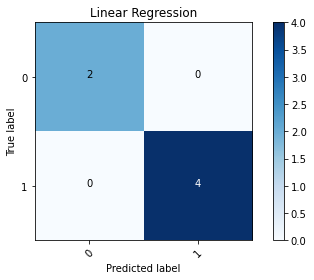

In [176]:
classes=list(set(y_test))
cm = confusion_matrix(y_test, y_test_pred_LR, labels=classes)
plot_confusion_matrix(cm, classes=classes, title='Linear Regression')
print(classification_report(y_test, y_test_pred_LR))


In [180]:
dfmasteruniqdropped = dfmasteruniq.drop(['Company', 'Year', 'ReportNumber', 'html', 'htmltext', 'tableid', 'table', 'tableinhtml', 'tableinhtmlcorr', 'matchtableinhtmlfirst', 'matchtableinhtmllast', 'tableleft', 'tableright', 'rawcontext', 'processedcontext'], axis = 1)
dfmasteruniqdropped.head()

full2 = pd.get_dummies(dfmasteruniqdropped, drop_first=True, dummy_na=True)
features2 = [f for f in full2.columns if f not in ['tweetid','annotationkey','activity_1', 'activity_2', 'activity_nan']]
len(features)



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1261

In [182]:

#X_finaltest = boruta_feature_selector.transform(dfmasteruniqdropped)


full2[features2] = full2[features2].fillna(full2[features2].mean()).clip(-1e9,1e9)

X_finalfortestnump = full2[features2].values

X_finalfortestnump.shape

X_finaltest = boruta_feature_selector.transform(X_finalfortestnump)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [183]:
y_finaltest_pred_LR = model_LR.predict(X_finaltest)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


246

In [185]:
dfmasteruniq['predictedgeoseg'] = list(y_finaltest_pred_LR)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [193]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', None)


dfmasteruniq['topicfrommodelreal'] = np.where(dfmasteruniq['topicfrommodel']== 1, 0, 1)

dfmasteruniq

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Company,Year,ReportNumber,html,htmltext,tableid,table,tableinhtml,tableinhtmlcorr,matchtableinhtmlfirst,matchtableinhtmllast,tableleft,tableright,rawcontext,processedcontext,topicfrommodel,countsumm,aboveth,access,accessori,accompani,accordingli,account,acquisit,across,...,unit_1,unitref_1,unreco_1,up_1,upon_1,usd_1,use_1,usgaap_1,valign_1,variou_1,vendor_1,verticalalign_1,vice_1,visibl_1,warranti_1,warrantiesact_1,weak_1,wearabl_1,weight_1,well_1,whitespac_1,width_1,within_1,predictedgeoseg,topicfrommodelreal
0,INFN,2020,65,"[[[], []], [[<Element div at 0x7ff2a6326590>, ...","b'<html xmlns=""http://www.w3.org/1999/xhtml"" x...",1,"[[Three Months Ended], [March 28, 2020, March ...","<table cellpadding=""0"" cellspacing=""0"" style=""...","<table cellpadding=""0"" cellspacing=""0"" style=""...",True,True,":1px solid #000000;""><div style=""text-align:le...","</div><span style=""font-family:inherit;font-si...",":1px solid #000000;""><div style=""text-align:le...",px solid the company sell product directly cu...,0,1,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0,1
1,INFN,2020,65,"[[[], []], [[<Element div at 0x7ff2a622be50>, ...","b'<html xmlns=""http://www.w3.org/1999/xhtml"" x...",2,"[[March 28, 2020, December 28, 2019], [United ...","<table cellpadding=""0"" cellspacing=""0"" style=""...","<table cellpadding=""0"" cellspacing=""0"" style=""...",True,True,"48px;font-size:10pt;""><span style=""font-family...","</div><span style=""font-family:inherit;font-si...","48px;font-size:10pt;""><span style=""font-family...",px fontsizept operating segment defined compon...,1,0,0,0,0,1,1,0,0,0,...,0.067984,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.098949,0.098949,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,1,0
2,INFN,2020,65,"[[[], []], [[<Element div at 0x7ff2a6327e00>, ...","b'<html xmlns=""http://www.w3.org/1999/xhtml"" x...",3,"[[March 28, 2020, December 28, 2019], [United ...","<table cellpadding=""0"" cellspacing=""0"" style=""...","<table cellpadding=""0"" cellspacing=""0"" style=""...",True,True,"48px;font-size:10pt;""><span style=""font-family...","</div><span style=""font-family:inherit;font-si...","48px;font-size:10pt;""><span style=""font-family...",px fontsizept operating segment defined compon...,1,0,0,0,0,1,1,0,0,0,...,0.067984,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.098949,0.098949,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,1,0
3,INFN,2019,128,"[[[], []], [[<Element header at 0x7ff2a6326590...","b'<html xmlns=""http://www.w3.org/1999/xhtml"" x...",1,"[[Three Months Ended, Nine Months Ended], [Sep...","<table cellpadding=""0"" cellspacing=""0"" style=""...","<table cellpadding=""0"" cellspacing=""0"" style=""...",True,True,8</nonfraction></span></span></div></td><td st...,"</div><span style=""font-family:inherit;font-si...",8</nonfraction></span></span></div></td><td st...,the following table present company revenue di...,0,1,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0,1
4,INFN,2019,128,"[[[], []], [[<Element header at 0x7ff2a622be50...","b'<html xmlns=""http://www.w3.org/1999/xhtml"" x...",2,"[[September 28, 2019, December 29, 2018], [Uni...","<table cellpadding=""0"" cellspacing=""0"" style=""...","<table cellpadding=""0"" cellspacing=""0"" style=""...",True,True,"3A3E-1""><div style=""line-height:120%;padding-t...","</div><span style=""font-family:inherit;font-si...","3A3E-1""><div style=""line-height:120%;padding-t...",ae operating segment defined component enterpr...,1,0,0,0,

In [197]:
dfmasteruniq['table'][0][-1]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Total revenue', '330,273', '292,707']

In [220]:
dfmasteruniq['revenueheader'] = dfmasteruniq.apply(lambda x: x['table'][0], axis=1)

dfmasteruniq['totalrevenues'] = dfmasteruniq.apply(lambda x: x['table'][-1], axis=1)



#dflss['processedcontext'] = dflss.apply(lambda x: str(x['processedcontext']).strip(" "), axis=1)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [257]:
dfmasteruniq['revenueheader'][0]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Three Months Ended']

In [ ]:
dfmasteruniq['totalrevenues'][8]

In [209]:
#colnamesdf = dfmasteruniq.columns.values.tolist()


['Company', 'Year', 'ReportNumber', 'html', 'htmltext', 'tableid', 'table', 'tableinhtml', 'tableinhtmlcorr', 'matchtableinhtmlfirst', 'matchtableinhtmllast', 'tableleft', 'tableright', 'rawcontext', 'processedcontext', 'topicfrommodel', 'countsumm', 'aboveth', 'access', 'accessori', 'accompani', 'accordingli', 'account', 'acquisit', 'across', 'act', 'action', 'activ', 'actual', 'ad', 'addit', 'address', 'administr', 'adopt', 'advanc', 'advers', 'advertis', 'ae', 'africa', 'agenc', 'align', 'alloc', 'also', 'although', 'america', 'americasamerica', 'amort', 'amount', 'analysi', 'andchief', 'annual', 'anoth', 'anticip', 'applic', 'approxim', 'apt', 'area', 'asia', 'asian', 'asiapacif', 'ass', 'assess', 'asset', 'assign', 'associ', 'attribut', 'australia', 'author', 'autom', 'avail', 'averag', 'backgroundcolor', 'balanc', 'balancelongliv', 'barista', 'base', 'basi', 'behalf', 'belief', 'better', 'billion', 'bold', 'bordertoppt', 'bordertoppx', 'bottom', 'brennanchief', 'brennanita', 'bro

In [258]:
#dfmasteruniqlong = pd.DataFrame(columns=['Company', "Year", "ReportNumber", "tableid", 'table', 'predictedgeoseg', 'topicfrommodelreal', 'totalrevenues', 'revenueheader', 'figure', 'figureid', 'quarterinfo'])

#dfnewshort
def hasNumbers(inputString):
    return any(char.isdigit() for char in inputString)


### FOR ARRAY OF TABLES
lss = []
for idx, row in tqdm(dfmasteruniq.iterrows()): ##ROW LEVEL
    for idex,i in enumerate(list(row['totalrevenues'])): ##CELL
        noemptytablelist = []
        if hasNumbers(i):
            noemptytablelist.append(i)

        #noemptytablelist = []
        #if i != '%':
        #    noemptytablelist.append(i)
        
        #res = [[ele for ele in sub if ele != '%'] for sub in noemptytablelist]
        #print(noemptytablelist)

        if noemptytablelist != []:
            roww = [row['Company'], row['Year'], row['ReportNumber'], row['tableid'], row['table'], row['predictedgeoseg'], row['topicfrommodelreal'], row['totalrevenues'], row['revenueheader'], idex+1, str(noemptytablelist)[1:-1].replace(',',"").replace('\'',"")]
            lss.append(roww) 


lss
      
         
#lss2 = []

#for idx, row in tqdm(df.iterrows()): ##ROW LEVEL
#    for idex,i in enumerate(list(row['arrayofhtmltables'])): ##CELL

#        roww = [row['Company'],row['Year'], row['ReportNumber'], row['html'], row["htmltext"], idex+1,str(i)]
    
#        lss2.append(roww)        




dfmasteruniqlong = pd.DataFrame(lss, columns = ['Company', "Year", "ReportNumber", "tableid", 'table', 'predictedgeoseg', 'topicfrommodelreal', 'totalrevenues', 'revenueheader', 'figureid', 'figure']) 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [259]:
dfmasteruniqlong

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Company,Year,ReportNumber,tableid,table,predictedgeoseg,topicfrommodelreal,totalrevenues,revenueheader,figureid,figure
0,INFN,2020,65,1,"[[Three Months Ended], [March 28, 2020, March ...",0,1,"[Total revenue, 330,273, 292,707]",[Three Months Ended],2,330273
1,INFN,2020,65,1,"[[Three Months Ended], [March 28, 2020, March ...",0,1,"[Total revenue, 330,273, 292,707]",[Three Months Ended],3,292707
2,INFN,2020,65,2,"[[March 28, 2020, December 28, 2019], [United ...",1,0,"[Total property, plant and equipment, net, 148...","[March 28, 2020, December 28, 2019]",2,148815
3,INFN,2020,65,2,"[[March 28, 2020, December 28, 2019], [United ...",1,0,"[Total property, plant and equipment, net, 148...","[March 28, 2020, December 28, 2019]",3,150793
4,INFN,2020,65,3,"[[March 28, 2020, December 28, 2019], [United ...",1,0,"[Total property, plant and equipment, net, 148...","[March 28, 2020, December 28, 2019]",2,148815
5,INFN,2020,65,3,"[[March 28, 2020, December 28, 2019], [United ...",1,0,"[Total property, plant and equipment, net, 148...","[March 28, 2020, December 28, 2019]",3,150793
6,INFN,2019,128,1,"[[Three Months Ended, Nine Months Ended], [Sep...",0,1,"[Total revenue, 325,341, 200,413, 914,298, 611...","[Three Months Ended, Nine Months Ended]",2,325341
7,INFN,2019,128,1,"[[Three Months Ended, Nine Months Ended], [Sep...",0,1,"[Total revenue, 325,341, 200,413, 914,298, 611...","[Three Months Ended, Nine Months Ended]",3,200413
8,INFN,2019,128,1,"[[Three Months Ended, Nine Months Ended], [Sep...",0,1,"[Total revenue, 325,341, 200,413, 914,298, 611...","[Three Months Ended, Nine Months Ended]",4,914298
9,INFN,2019,128,1,"[[Three Months Ended, Nine Months Ended], [Sep...",0,1,"[Total revenue, 325,341, 200,413, 914,298, 611...","[Three Months Ended, Nine Months Ended]",5,611321


In [268]:
dfmasteruniqlong['json'] = dfmasteruniqlong.apply(lambda x: x.to_json(), axis=1)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [269]:
type(dfmasteruniqlong['json'][0])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


str

In [273]:
import json
json.loads(dfmasteruniqlong['json'][0])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'Company': 'INFN',
 'Year': 2020,
 'ReportNumber': 65,
 'tableid': 1,
 'table': [['Three Months Ended'],
  ['March\xa028, 2020', 'March\xa030, 2019'],
  ['United States', '170,526', '132,522'],
  ['Other Americas', '19,688', '15,132'],
  ['Europe, Middle East and Africa', '88,578', '98,992'],
  ['Asia Pacific', '51,481', '46,061'],
  ['Total revenue', '330,273', '292,707']],
 'predictedgeoseg': 0,
 'topicfrommodelreal': 1,
 'totalrevenues': ['Total revenue', '330,273', '292,707'],
 'revenueheader': ['Three Months Ended'],
 'figureid': 2,
 'figure': '330273',
 'json': '{"Company":"INFN","Year":2020,"ReportNumber":65,"tableid":1,"table":[["Three Months Ended"],["March\\u00a028, 2020","March\\u00a030, 2019"],["United States","170,526","132,522"],["Other Americas","19,688","15,132"],["Europe, Middle East and Africa","88,578","98,992"],["Asia Pacific","51,481","46,061"],["Total revenue","330,273","292,707"]],"predictedgeoseg":0,"topicfrommodelreal":1,"totalrevenues":["Total revenue","330,2